<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Regresion_Logistica_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Paper: Comparison of machine learning algorithm for Santander dataset  ###
###############################################################################
#### Integrantes  #############################################################
#### -
#### -
#### -
#### -
###############################################################################

## Paso 1: Importar los dateset enviados por el profesor
import pandas as pd
import numpy as np

# 1.1 Definir las rutas (al estar en la raíz de la carpeta 'Files', la ruta es directa)
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 1.2 Cargar los datos
# El paper menciona que trabajamos con 200,000 registros por archivo
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()
test_df.head()

print(f"¡Carga completada desde el almacenamiento local!")
print(f"Registros cargados: {len(train_df)}")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Paso 2: Pre - procesamiento de la información
# 2.1 Separación de variables predictoras (X) y objetivo (y)
# Basado en la estructura vista en head(), eliminamos ID y Target
X = train_df.drop(['ID_code', 'target'], axis=1)
y = train_df['target']

# 2.2 Normalización de Rango 0-1 (Exigencia del Paper y segun lo aprendido en clase)
scaler = MinMaxScaler(feature_range=(0, 1)) #escalador de datos
X_scaled = scaler.fit_transform(X) #Calcula los mínimos/máximos (fit) y escala los datos al rango 0-1 (transform) en un solo paso.

# Convertimos a DataFrame para mantener consistencia con las funciones de clase
X_final = pd.DataFrame(X_scaled, columns=X.columns)

# 2.3 División de datos para Validación (Rúbrica)
# Usamos un 20% para test y estratificamos para manejar el desbalance
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos listos para la Regresión Logística.")
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de validación: {X_val.shape}")
print(f"Nuevo valor mínimo de var_0: {X_final['var_0'].min()}")
print(f"Nuevo valor máximo de var_0: {X_final['var_0'].max()}")

¡Carga completada desde el almacenamiento local!
Registros cargados: 200000
Datos listos para la Regresión Logística.
Tamaño de entrenamiento: (160000, 200)
Tamaño de validación: (40000, 200)
Nuevo valor mínimo de var_0: 0.0
Nuevo valor máximo de var_0: 0.9999999999999999


Entrenando modelos...


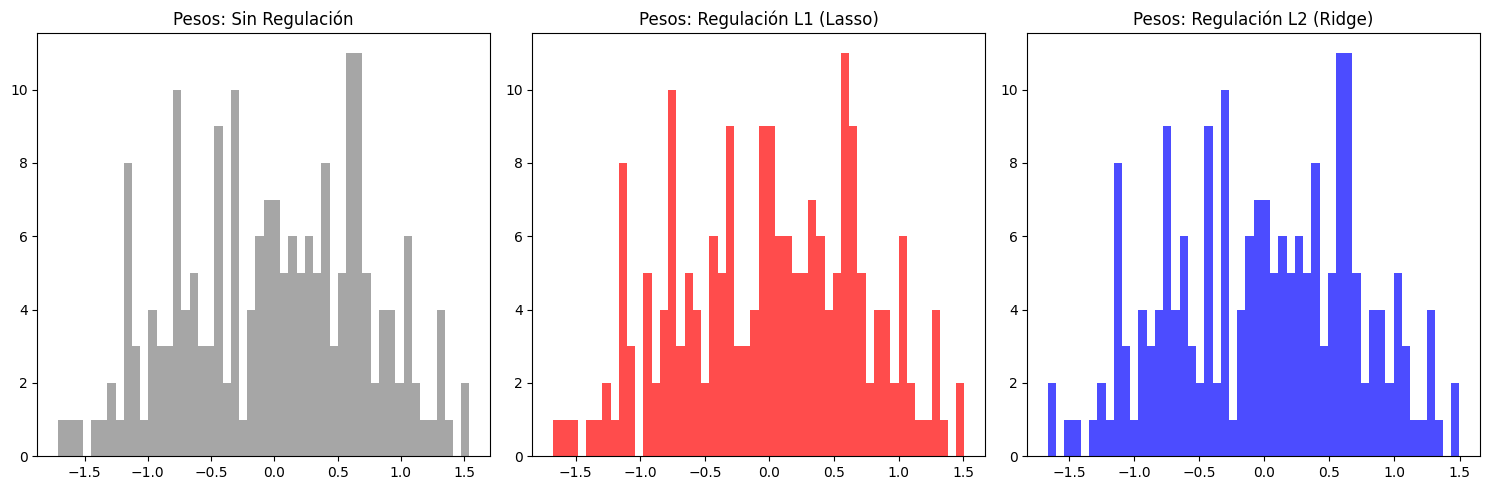

In [23]:
################################################################################
#### Modelo 1 - Regresión Logística  ###########################################
#### Con y sin regularización        ###########################################
################################################################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# 1. Sin Regulación (Usamos lbfgs, es muy rápido para esto)
model_none = LogisticRegression(C=1e10, solver='lbfgs', class_weight='balanced',
                                max_iter=2000, n_jobs=-1, random_state=42)

# 2. Con Regulación L1 (Cambiamos liblinear por SAGA para usar n_jobs=-1)
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='saga', class_weight='balanced',
                              max_iter=500, n_jobs=-1, random_state=42) # Saga converge con menos iteraciones

# 3. Con Regulación L2 (Usamos lbfgs con n_jobs)
model_l2 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', class_weight='balanced',
                              max_iter=2000, n_jobs=-1, random_state=42)

# Entrenamiento
print("Entrenando modelos...")
model_none.fit(X_train, y_train)
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# --- VISUALIZACIÓN DE PESOS  ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(model_none.coef_.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pesos: Sin Regulación')

plt.subplot(1, 3, 2)
plt.hist(model_l1.coef_.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Pesos: Regulación L1 (Lasso)')

plt.subplot(1, 3, 3)
plt.hist(model_l2.coef_.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pesos: Regulación L2 (Ridge)')

plt.tight_layout()
plt.show()

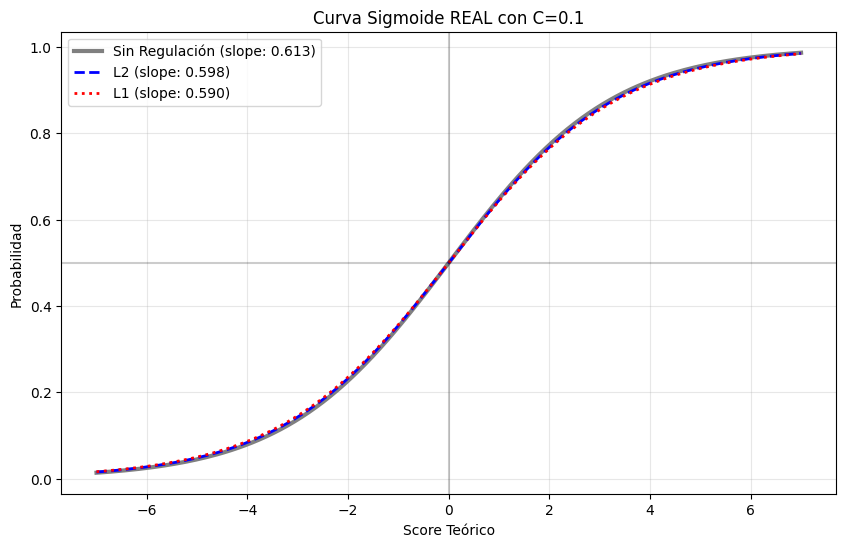

Pendiente L1 con C=0.1: 0.5895177835096532


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculamos la "fuerza" (media de los valores absolutos de los coeficientes)
# Esto nos dará la pendiente real que el modelo está aplicando
slope_none = np.mean(np.abs(model_none.coef_))
slope_l1 = np.mean(np.abs(model_l1.coef_))
slope_l2 = np.mean(np.abs(model_l2.coef_))

z_range = np.linspace(-7, 7, 200)

plt.figure(figsize=(10, 6))

# Graficamos usando las pendientes reales escaladas para visualización
plt.plot(z_range, sigmoid(z_range * slope_none), color='gray', lw=3, label=f'Sin Regulación (slope: {slope_none:.3f})')
plt.plot(z_range, sigmoid(z_range * slope_l2), color='blue', lw=2, linestyle='--', label=f'L2 (slope: {slope_l2:.3f})')
plt.plot(z_range, sigmoid(z_range * slope_l1), color='red', lw=2, linestyle=':', label=f'L1 (slope: {slope_l1:.3f})')

plt.axhline(0.5, color='black', linestyle='-', alpha=0.2)
plt.axvline(0, color='black', linestyle='-', alpha=0.2)
plt.title(f'Curva Sigmoide REAL con C={model_l1.C}') # Muestra el C actual
plt.xlabel('Score Teórico')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Pendiente L1 con C={model_l1.C}: {slope_l1}")

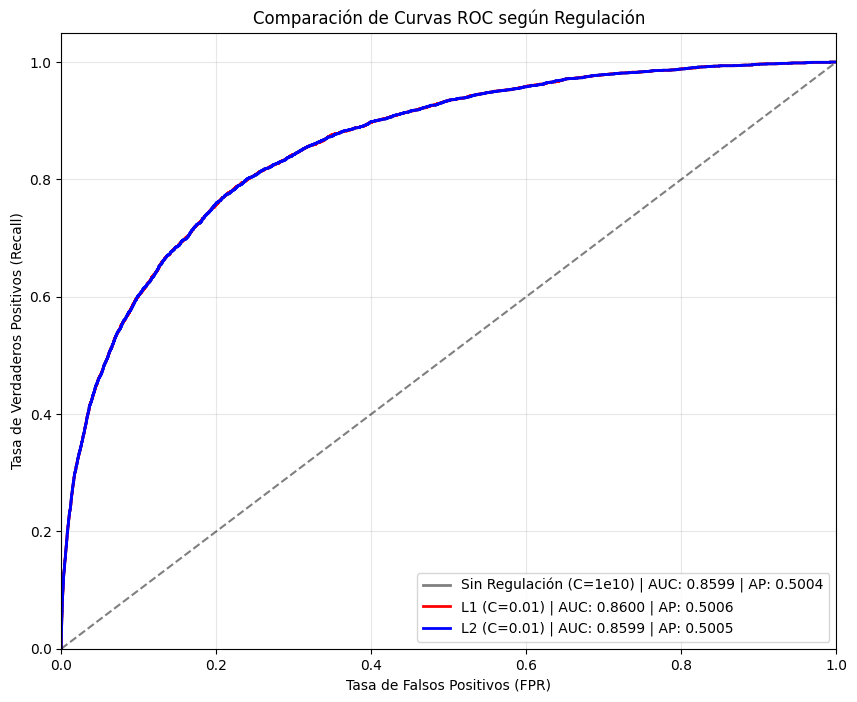

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

modelos = [model_none, model_l1, model_l2]
nombres = ['Sin Regulación (C=1e10)', 'L1 (C=0.01)', 'L2 (C=0.01)']
colores = ['gray', 'red', 'blue']

plt.figure(figsize=(10, 8))

for mod, nombre, color in zip(modelos, nombres, colores):
    # Obtener probabilidades
    y_proba = mod.predict_proba(X_val)[:, 1]

    # Calcular métricas
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    auc = roc_auc_score(y_val, y_proba)
    ap = average_precision_score(y_val, y_proba) # AUC de la curva Precision-Recall

    # Graficar ROC
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{nombre} | AUC: {auc:.4f} | AP: {ap:.4f}')

# Configuración del gráfico
plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Comparación de Curvas ROC según Regulación')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Modelo               | Precision  | Recall     | F1-Score  
-------------------------------------------------------
Sin Regulación       | 0.2864     | 0.7749     | 0.4182
L1 (C=0.01)          | 0.2874     | 0.7769     | 0.4195
L2 (C=0.01)          | 0.2864     | 0.7756     | 0.4184


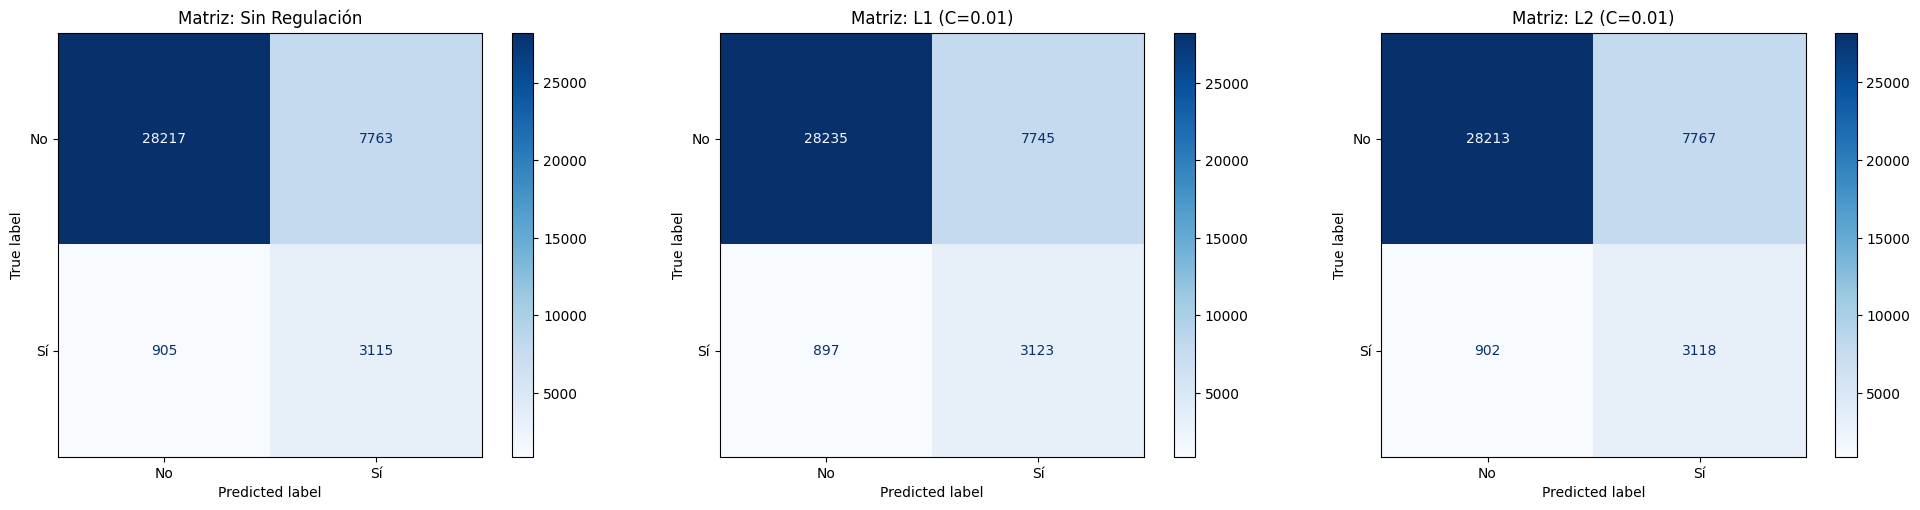

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

modelos = [model_none, model_l1, model_l2]
nombres = ['Sin Regulación', 'L1 (C=0.01)', 'L2 (C=0.01)']

# Configuración de la visualización
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

print(f"{'Modelo':<20} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 55)

for i, (mod, nombre) in enumerate(zip(modelos, nombres)):
    y_pred = mod.predict(X_val)

    # Cálculo de métricas para la clase 1 (Transacciona)
    p = precision_score(y_val, y_pred)
    r = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"{nombre:<20} | {p:.4f}     | {r:.4f}     | {f1:.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Sí'])
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f'Matriz: {nombre}')

plt.tight_layout()
plt.show()